In [ ]:
import pandas as pd

df = pd.read_csv("//content/train.csv.zip")  # Adjust path if needed
print(df.head())  # Show first 5 rows


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
print(df.info())
print("\n missing values in each column:\n",df.isnull().sum())
print("\n summary statistics:\n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [ ]:
#to make all columns in small
df.columns=df.columns.str.strip().str.lower().str.replace(" ", "_")




In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True)
df["ship_date"] = pd.to_datetime(df["ship_date"], dayfirst=True)






In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df["postal_code"] = df["postal_code"].fillna(0)


In [ ]:
df.isnull().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [ ]:
df['sales']=pd.to_numeric(df["sales"],errors="coerce")

In [ ]:
df.isnull().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


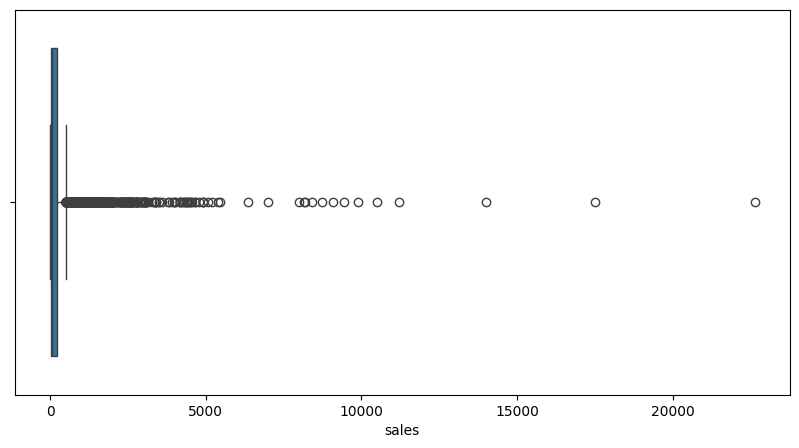

In [ ]:
#to check extreme values we use boxplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(x=df["sales"])
plt.show()

In [ ]:
#We will use the Interquartile Range (IQR) method to detect and optionally cap extreme values.
Q1 = df["sales"].quantile(0.25)
Q3 = df["sales"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["sales"] < lower_bound) | (df["sales"] > upper_bound)]
print(f"Total outliers: {outliers.shape[0]}")


Total outliers: 1145


In [ ]:
#Run this code to replace extreme values with the upper limit
df["sales"] = df["sales"].apply(lambda x: upper_bound if x > upper_bound else x)


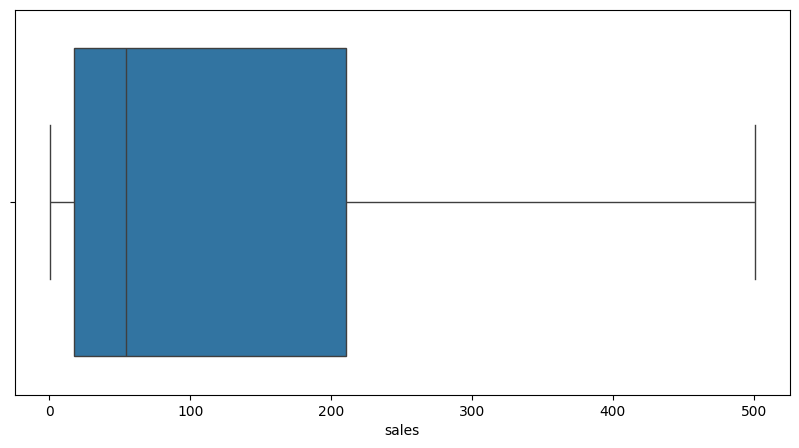

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["sales"])
plt.show()


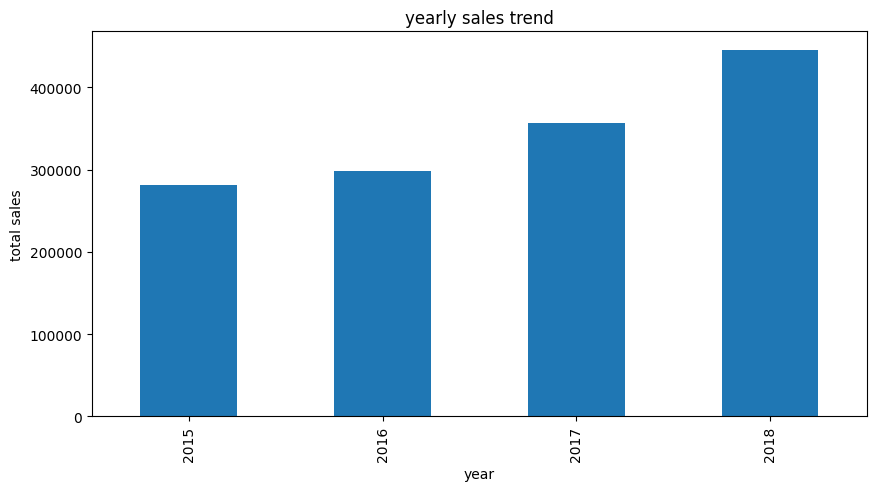

In [ ]:
df.groupby(df["order_date"].dt.year)["sales"].sum().plot(kind="bar",figsize=(10,5))
plt.xlabel("year")
plt.ylabel("total sales")
plt.title("yearly sales trend")
plt.show()

<ipython-input-51-3c087d03b8f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='Blues_r')


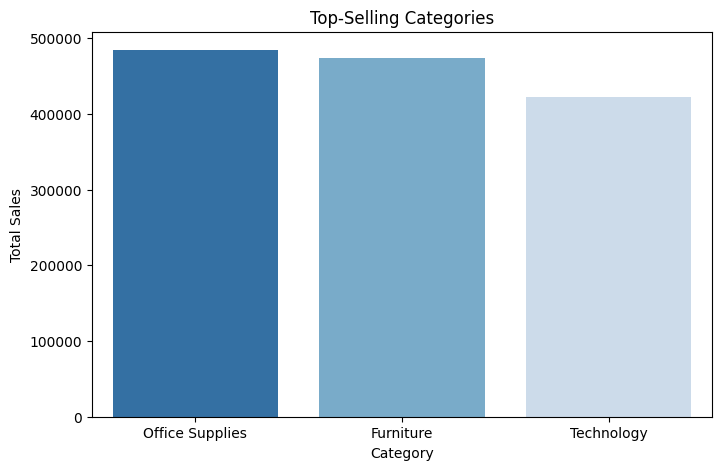

In [ ]:
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Blues_r')

plt.title("Top-Selling Categories")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()



#Outliers in Sales:

The dataset contains 1,145 outliers in sales values.
The box plot shows that a few extreme values significantly impact the distribution.
Yearly Sales Trend:

Sales have been increasing every year from 2015 to 2018.
The highest sales were recorded in 2018, showing growth in business.
Top-Selling Categories:

The Office Supplies category has the highest total sales.
Furniture follows closely behind, while Technology has the lowest sales among the three.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/train.csv.zip")



In [ ]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [ ]:
import pandas as pd

df = pd.read_csv("/content/train.csv.zip")  # Adjust path if needed
print(df.head())  # Show first 5 rows

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df = df.dropna(subset=['Postal Code'])


In [ ]:
duplicate_rows= df.duplicated().sum()
print(f"total duplicate rows:{duplicate_rows}")

total duplicate rows:0


In [ ]:
df=df.dropna(subset=["Postal Code"])
print("rows with missing postal code removed")

rows with missing postal code removed


In [ ]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [ ]:
print(df.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [ ]:
# Convert dates to datetime format with correct day-month order
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Convert Postal Code to string (remove decimal points)
df['Postal Code'] = df['Postal Code'].astype('Int64').astype(str)

# Verify changes
print(df.dtypes)



Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [ ]:
# Extract year, month, day, and weekday from Order Date
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.day_name()

# Verify changes
df[['Order Date', 'Order Year', 'Order Month', 'Order Day', 'Order Weekday']].head()


,Order Date,Order Year,Order Month,Order Day,Order Weekday
0,2017-11-08,2017,11,8,Wednesday
1,2017-11-08,2017,11,8,Wednesday
2,2017-06-12,2017,6,12,Monday
3,2016-10-11,2016,10,11,Tuesday
4,2016-10-11,2016,10,11,Tuesday


In [ ]:
# Calculate delivery time (difference between Ship Date and Order Date)
df['Delivery Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

# Verify the new column
df[['Order Date', 'Ship Date', 'Delivery Time (Days)']].head()


,Order Date,Ship Date,Delivery Time (Days)
0,2017-11-08,2017-11-11,3
1,2017-11-08,2017-11-11,3
2,2017-06-12,2017-06-16,4
3,2016-10-11,2016-10-18,7
4,2016-10-11,2016-10-18,7


In [ ]:
df['Delivery Time (Days)'].describe()

,Delivery Time (Days)
count,9789.000000
mean,3.961181
std,1.750452
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [ ]:
#Key Insights:
# Average delivery time = ~4 days
# Most orders delivered in 3-5 days (as per 25%-75% range)
# Fastest delivery = 0 days (same-day delivery)
# Longest delivery = 7 days

In [ ]:
df['Delivery Time (Days)'].value_counts().sort_index()

,count
Delivery Time (Days),
0,514
1,363
2,1294
3,978
4,2709
5,2146
6,1170
7,615


In [ ]:
df.groupby('Ship Mode')['Delivery Time (Days)'].mean().sort_values()

,Delivery Time (Days)
Ship Mode,
Same Day,0.044610
First Class,2.179214
Second Class,3.249868
Standard Class,5.009916


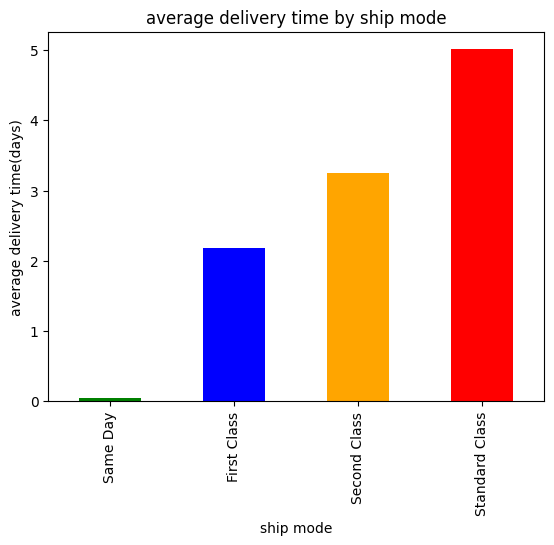

In [ ]:
import matplotlib.pyplot as plt
# Ship Mode vs. Delivery Time Bar Chart
df.groupby('Ship Mode')['Delivery Time (Days)'].mean().sort_values().plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.xlabel('ship mode')
plt.ylabel('average delivery time(days)')
plt.title('average delivery time by ship mode')
plt.show()

In [ ]:
#Observations from the Bar Chart:
# Same Day delivery is almost instant (near 0 days).
# First Class takes around 2 days on average.
# Second Class takes about 3.2 days on average.
# Standard Class has the longest delivery time (~5 days).

# Conclusion:

#If customers want faster delivery, they should choose First Class or Same Day delivery.
#Standard Class is the slowest but likely the most cost-effective.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("//content/train.csv.zip")  # Adjust path if needed
print(df.head())  # Show first 5 rows

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()


Total duplicate rows: 0


In [ ]:
missing_values=df.isnull().sum()
print(missing_values)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [ ]:
df['Postal Code'].fillna('Unknown')


,Postal Code
0,42420.0
1,42420.0
2,90036.0
3,33311.0
4,33311.0
...,...
9795,60610.0
9796,43615.0
9797,43615.0
9798,43615.0


In [ ]:
import pandas as pd

# Replace 'Unknown' with NaN
df['Postal Code'] = df['Postal Code'].replace('Unknown', pd.NA)

# Convert Postal Code to numeric (ignoring errors) and keep NaN
df['Postal Code'] = pd.to_numeric(df['Postal Code'], errors='coerce')

# Convert to integer (only if needed)
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

# Convert back to string (optional, if needed)
df['Postal Code'] = df['Postal Code'].astype(str).replace('0', 'Unknown')



In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
df['Postal Code'] = pd.to_numeric(df['Postal Code'], errors='coerce')  # Convert to numeric, keeping NaN
df['Postal Code'] = df['Postal Code'].astype('Int64')  # Convert to Int64 (supports NaN)


In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
df.duplicated().sum()
print(f"number of duplicate rows: {duplicates}")
df= df.drop_duplicates()
print(f"shape after removing duplicates: {df.shape}")



number of duplicate rows: 0
shape after removing duplicates: (9800, 18)


In [ ]:
# Check missing values again
missing_values = df.isnull().sum()
print(missing_values)

# Fill missing Postal Codes with the most common Postal Code
df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)

# Verify after filling
print(f"Missing values after filling:\n{df.isnull().sum()}")


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64
Missing values after filling:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


<ipython-input-67-47d93ec819dc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)


In [ ]:
# Convert Order Date and Ship Date to datetime format (European format detected)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Convert Postal Code to string
df['Postal Code'] = df['Postal Code'].astype(str)

# Verify changes
print(df.dtypes)



Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [ ]:
# Extracting year, month, and day of the week
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.day_name()

df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day
df['Ship Weekday'] = df['Ship Date'].dt.day_name()

# Checking the new features
df[['Order Date', 'Order Year', 'Order Month', 'Order Day', 'Order Weekday']].head()

,Order Date,Order Year,Order Month,Order Day,Order Weekday
0,2017-11-08,2017,11,8,Wednesday
1,2017-11-08,2017,11,8,Wednesday
2,2017-06-12,2017,6,12,Monday
3,2016-10-11,2016,10,11,Tuesday
4,2016-10-11,2016,10,11,Tuesday


In [ ]:
# Calculate shipping duration
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Check the results
df[['Order Date', 'Ship Date', 'Shipping Duration']].head()


,Order Date,Ship Date,Shipping Duration
0,2017-11-08,2017-11-11,3
1,2017-11-08,2017-11-11,3
2,2017-06-12,2017-06-16,4
3,2016-10-11,2016-10-18,7
4,2016-10-11,2016-10-18,7


In [ ]:
# Extract features from Ship Date
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day
df['Ship Weekday'] = df['Ship Date'].dt.day_name()

# Check the results
df[['Ship Date', 'Ship Year', 'Ship Month', 'Ship Day', 'Ship Weekday']].head()


,Ship Date,Ship Year,Ship Month,Ship Day,Ship Weekday
0,2017-11-11,2017,11,11,Saturday
1,2017-11-11,2017,11,11,Saturday
2,2017-06-16,2017,6,16,Friday
3,2016-10-18,2016,10,18,Tuesday
4,2016-10-18,2016,10,18,Tuesday


In [ ]:
# Count the number of unique customers
num_unique_customers = df['Customer ID'].nunique()

# Count the number of orders per customer
customer_order_counts = df['Customer ID'].value_counts()

# Display results
print(f"Total Unique Customers: {num_unique_customers}")
print("\nTop 5 customers with most orders:")
print(customer_order_counts.head())


Total Unique Customers: 793

Top 5 customers with most orders:
Customer ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
Name: count, dtype: int64


In [ ]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales per Order
avg_sales_per_order = df['Sales'].mean()

# Highest Sales
highest_sales = df['Sales'].max()

# Display Results
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales per Order: ${avg_sales_per_order:,.2f}")
print(f"Highest Single Sale: ${highest_sales:,.2f}")


Total Sales: $2,261,536.78
Average Sales per Order: $230.77
Highest Single Sale: $22,638.48


In [ ]:
top_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Best-Selling Products by Total Sales:\n", top_selling_products)


Top 5 Best-Selling Products by Total Sales:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


In [ ]:
least_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).head(5)
print("Bottom 5 Least-Selling Products by Total Sales:\n", least_selling_products)


Bottom 5 Least-Selling Products by Total Sales:
 Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Acme Serrated Blade Letter Opener                                   7.632
Name: Sales, dtype: float64


In [ ]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month', 'Order Day',
       'Order Weekday', 'Ship Year', 'Ship Month', 'Ship Day', 'Ship Weekday',
       'Shipping Duration'],
      dtype='object')


In [ ]:
df['Estimated Profit'] = df['Sales'] * 0.25  # Assuming 25% profit margin

most_profitable_products = df.groupby('Product Name')['Estimated Profit'].sum().sort_values(ascending=False).head(5)
print("Top 5 Most Profitable Products:\n", most_profitable_products)


Top 5 Most Profitable Products:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          15399.95600
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     6863.34600
Cisco TelePresence System EX90 Videoconferencing Unit                           5659.62000
HON 5400 Series Task Chairs for Big and Tall                                    5467.64400
GBC DocuBind TL300 Electric Binding System                                      4955.86975
Name: Estimated Profit, dtype: float64


In [ ]:
least_profitable_products = df.groupby('Product Name')['Estimated Profit'].sum().sort_values().head(5)
print("Bottom 5 Least Profitable Products:\n", least_profitable_products)


Bottom 5 Least Profitable Products:
 Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    0.406
Avery 5                                                             1.440
Xerox 20                                                            1.620
Grip Seal Envelopes                                                 1.768
Acme Serrated Blade Letter Opener                                   1.908
Name: Estimated Profit, dtype: float64


In [ ]:
top_customers_profit = df.groupby('Customer Name')['Estimated Profit'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Profit Contribution:\n", top_customers_profit)


Top 5 Customers by Profit Contribution:
 Customer Name
Sean Miller      6260.76250
Tamara Chand     4763.05450
Raymond Buch     3779.33475
Tom Ashbrook     3648.90500
Adrian Barton    3618.39275
Name: Estimated Profit, dtype: float64


In [ ]:
profit_by_category = df.groupby('Category')['Estimated Profit'].sum().sort_values(ascending=False)
print("Profit by Category:\n", profit_by_category)

profit_by_subcategory = df.groupby('Sub-Category')['Estimated Profit'].sum().sort_values(ascending=False)
print("\nProfit by Sub-Category:\n", profit_by_subcategory)


Profit by Category:
 Category
Technology         206863.968250
Furniture          182164.643925
Office Supplies    176355.583500
Name: Estimated Profit, dtype: float64

Profit by Sub-Category:
 Sub-Category
Phones         81945.612000
Chairs         80705.682750
Storage        54835.848000
Tables         50702.657000
Binders        50007.196250
Machines       47309.657750
Accessories    41046.675000
Copiers        36562.023500
Bookcases      28453.299675
Appliances     26154.600750
Furnishings    22303.004500
Paper          19207.076000
Supplies       11605.077000
Art             6676.352500
Envelopes       4032.011500
Labels          3086.931500
Fasteners        750.490000
Name: Estimated Profit, dtype: float64


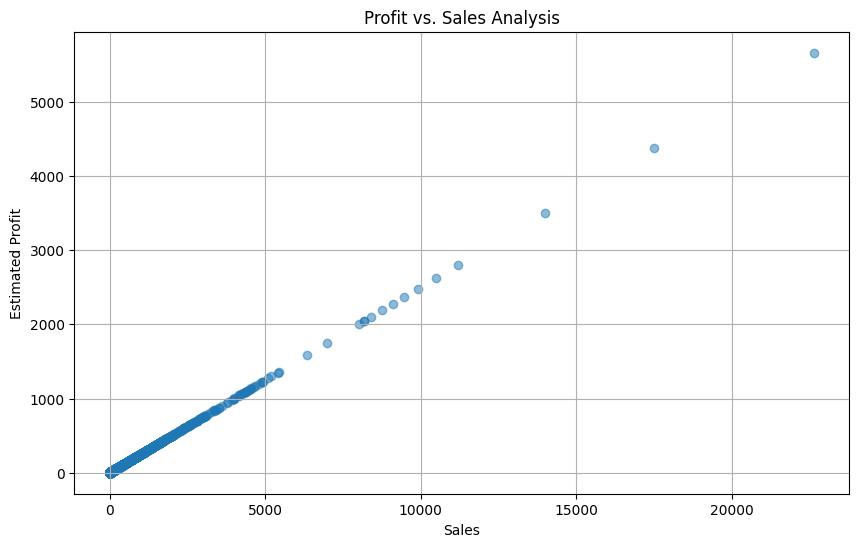

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Sales'], df['Estimated Profit'], alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Estimated Profit")
plt.title("Profit vs. Sales Analysis")
plt.grid()
plt.show()


In [ ]:
#Your scatter plot shows a positive correlation between Sales and Profit.
# Most data points follow an upward trend, meaning higher sales generally lead to higher profits.
# However, there are some variations—some sales values might not bring proportionate profits.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load dataset again and store it in sales_data
sales_data = pd.read_csv("/content/train.csv.zip")  # Replace with your actual filename


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

missing_values, data_types


(Row ID           0
 Order ID         0
 Order Date       0
 Ship Date        0
 Ship Mode        0
 Customer ID      0
 Customer Name    0
 Segment          0
 Country          0
 City             0
 State            0
 Postal Code      0
 Region           0
 Product ID       0
 Category         0
 Sub-Category     0
 Product Name     0
 Sales            0
 dtype: int64,
 Row ID             int64
 Order ID          object
 Order Date        object
 Ship Date         object
 Ship Mode         object
 Customer ID       object
 Customer Name     object
 Segment           object
 Country           object
 City              object
 State             object
 Postal Code       object
 Region            object
 Product ID        object
 Category          object
 Sub-Category      object
 Product Name      object
 Sales            float64
 dtype: object)

In [ ]:
# Check for duplicate rows
print(sales_data.duplicated().sum())



0


In [ ]:
# Convert Order Date and Ship Date to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%d/%m/%Y')
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'], format='%d/%m/%Y')

# Verify the changes
print(sales_data.dtypes)


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [ ]:
# Extract Year, Month, and Day from Order Date
sales_data['Order Year'] = sales_data['Order Date'].dt.year
sales_data['Order Month'] = sales_data['Order Date'].dt.month
sales_data['Order Day'] = sales_data['Order Date'].dt.day

# Display the first 5 rows to verify
print(sales_data[['Order Date', 'Order Year', 'Order Month', 'Order Day']].head())


  Order Date  Order Year  Order Month  Order Day
0 2017-11-08        2017           11          8
1 2017-11-08        2017           11          8
2 2017-06-12        2017            6         12
3 2016-10-11        2016           10         11
4 2016-10-11        2016           10         11


In [ ]:
# Calculate Shipping Duration
sales_data['Shipping Duration'] = (sales_data['Ship Date'] - sales_data['Order Date']).dt.days

# Display the first 5 rows to verify
print(sales_data[['Order Date', 'Ship Date', 'Shipping Duration']].head())


  Order Date  Ship Date  Shipping Duration
0 2017-11-08 2017-11-11                  3
1 2017-11-08 2017-11-11                  3
2 2017-06-12 2017-06-16                  4
3 2016-10-11 2016-10-18                  7
4 2016-10-11 2016-10-18                  7


In [ ]:
# Group by Order Year and Order Month to calculate total sales per month
monthly_sales = sales_data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Display first 10 rows
print(monthly_sales.head(10))


   Order Year  Order Month       Sales
0        2015            1  14205.7070
1        2015            2   4519.8920
2        2015            3  55205.7970
3        2015            4  27906.8550
4        2015            5  23644.3030
5        2015            6  34322.9356
6        2015            7  33781.5430
7        2015            8  27117.5365
8        2015            9  81623.5268
9        2015           10  31453.3930


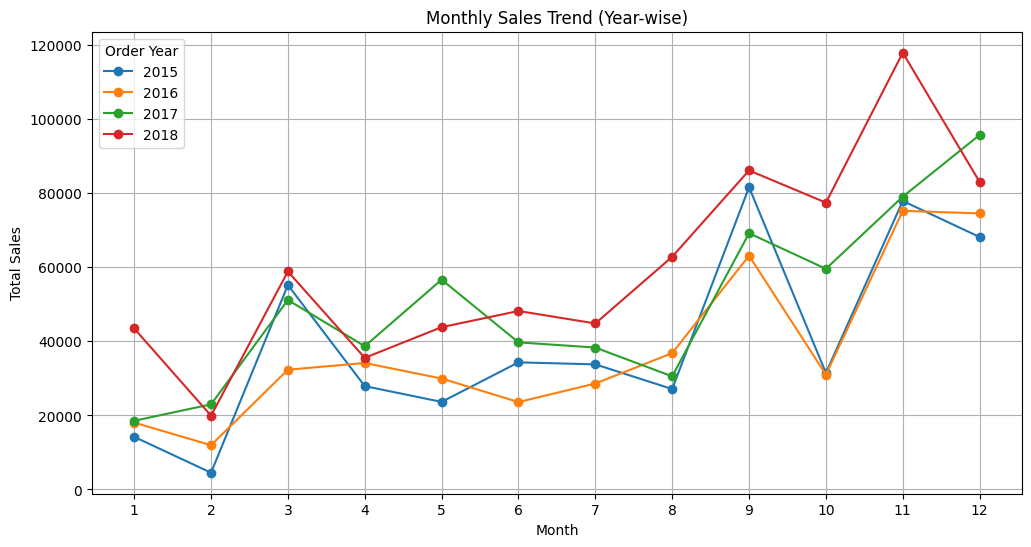

In [ ]:
import matplotlib.pyplot as plt

# Pivot data so each year has a separate line
pivot_data = monthly_sales.pivot(index='Order Month', columns='Order Year', values='Sales')

# Plot
plt.figure(figsize=(12, 6))
pivot_data.plot(marker='o', linestyle='-', ax=plt.gca())

# Labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend (Year-wise)')
plt.xticks(range(1, 13))  # Ensure all 12 months are displayed
plt.grid(True)
plt.legend(title="Order Year")

# Show the plot
plt.show()



In [ ]:
#Observations from the Graph:
#Sales Increase Toward Year-End 📈

#Sales peak in September, November, and December across multiple years.
#December 2018 has the highest sales (~120,000).
#March & September Spikes

#Most years show a sharp rise in March (possible seasonal trend).
#A similar pattern is seen in September.
#2018 has the Highest Sales Growth

#Sales in 2018 are consistently higher than other years.
#There's a steep increase after August 2018.

In [ ]:
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [ ]:
# Group by product name and sum total sales
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)


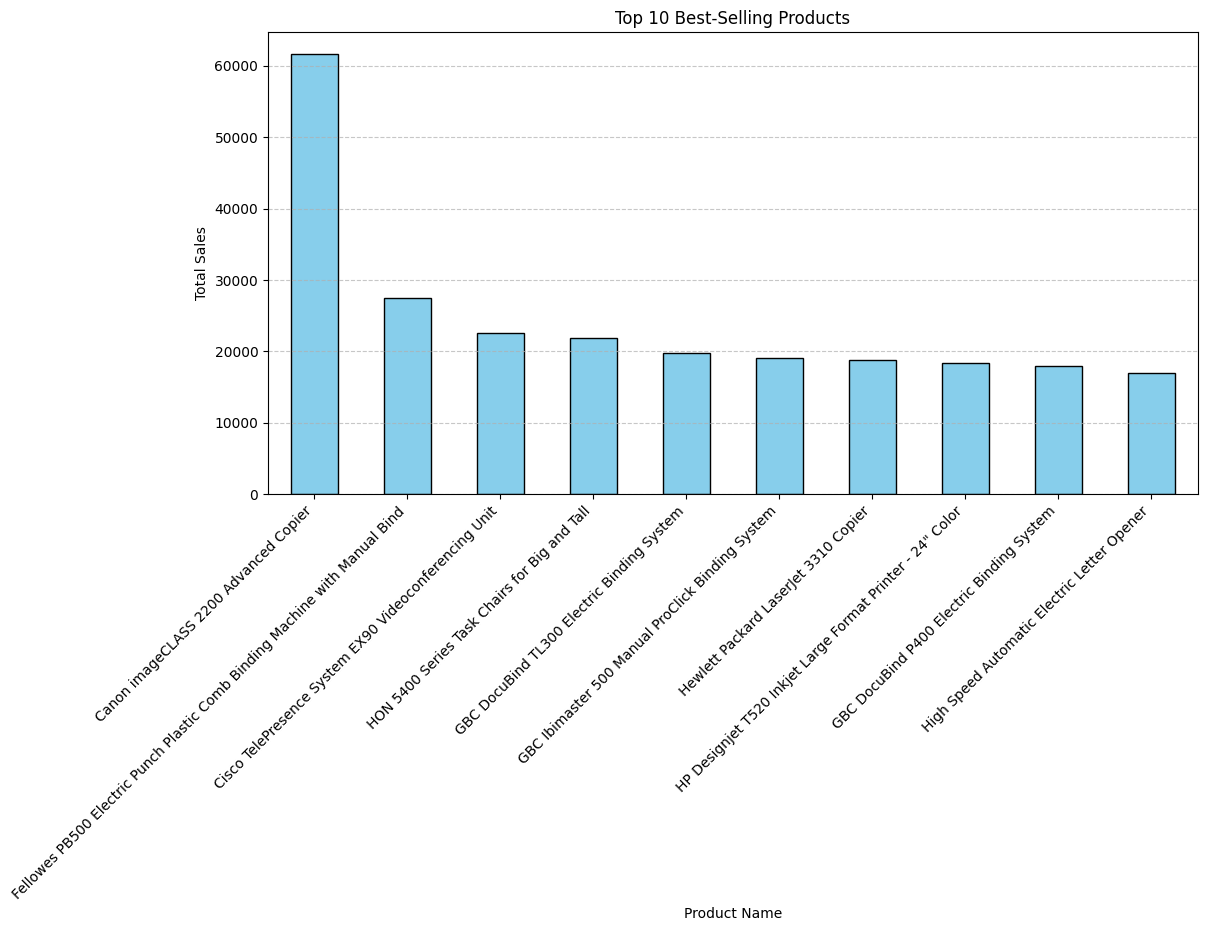

In [ ]:
# Group by Product Name and sum total sales
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#OBSERVATIONS
#Canon ImageCLASS 2200 Advanced Copier has the highest total sales.
#Binding Machines, Video Conferencing Units, and Chairs also have high sales.
#The difference between the top product and others is significant.

In [ ]:
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


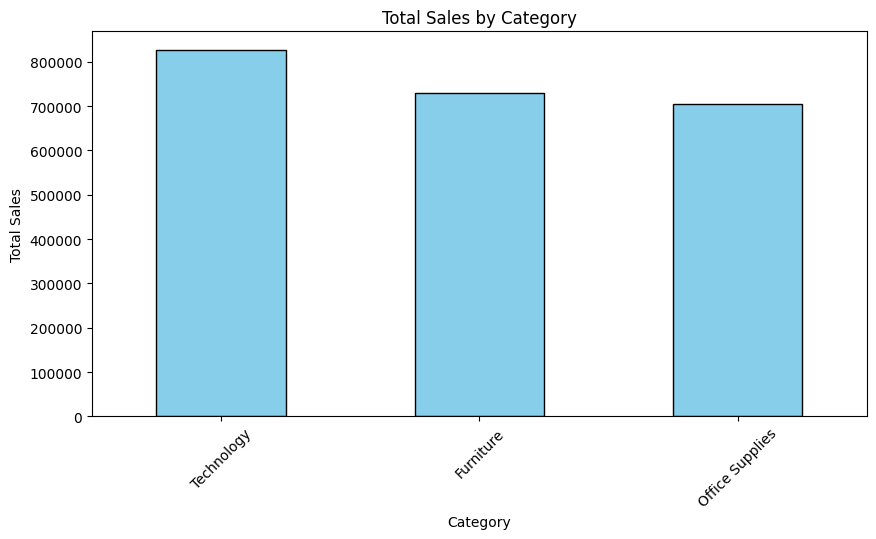

In [ ]:
import matplotlib.pyplot as plt

# Group by category and sum total sales
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 5))
category_sales.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.xticks(rotation=45)

# Show plot
plt.show()


In [ ]:
#Technology has the highest total sales.⃣
#furniture and Office Supplies have almost similar sales, but Furniture is slightly ahead.

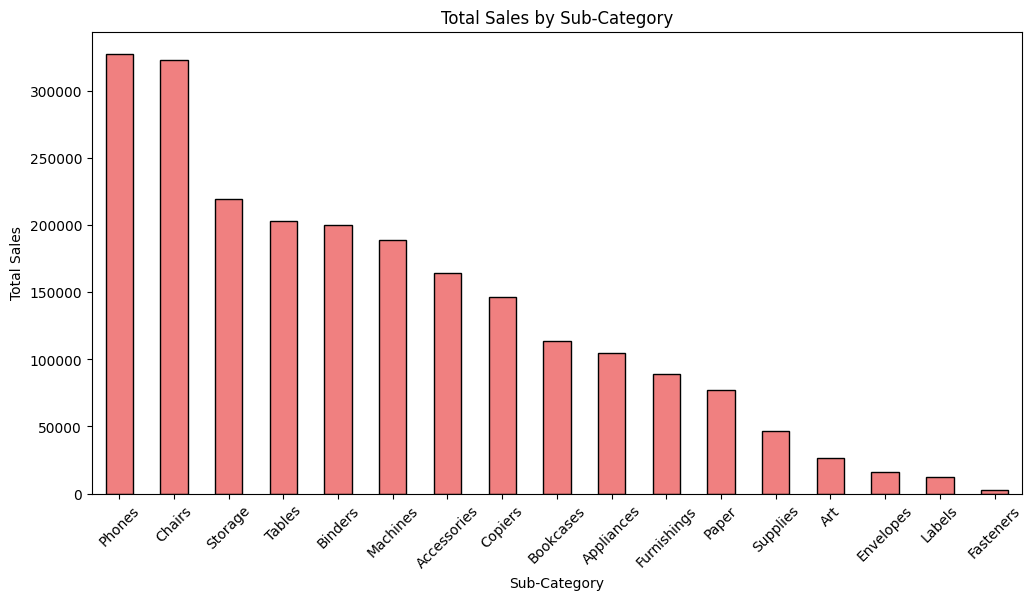

In [ ]:
# Group by Sub-Category and sum total sales
subcategory_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
subcategory_sales.plot(kind="bar", color="lightcoral", edgecolor="black")

# Labels and title
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Sub-Category")
plt.xticks(rotation=45)

# Show plot
plt.show()


In [ ]:
# Phones and Chairs contribute the highest sales.
# Storage, Tables, and Binders are also major revenue drivers.
# Fasteners, Labels, and Envelopes have the lowest sales.

#Key Insights:
#Technology-related products (Phones) and Furniture items (Chairs, Tables, Storage) are top-selling.
#Office Supplies like Fasteners and Labels have very low sales, indicating lower demand.
#The company should focus marketing on high-sales categories and analyze why certain products underperform.


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)


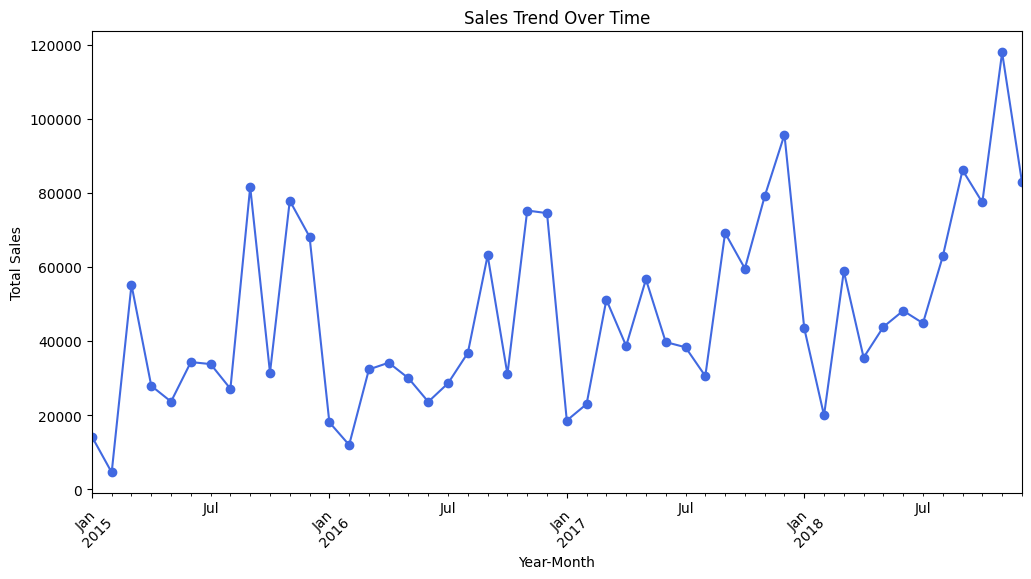

In [ ]:
# Convert 'Order Date' to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Group by Year-Month and sum total sales
df["Year-Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Year-Month")["Sales"].sum()

# Plot the line chart
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", color="royalblue", linestyle="-")

# Labels and title
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)

# Show plot
plt.show()


In [ ]:
#Observations:
# Growth: Sales have shown an upward trend, especially after mid-2017.
# Fluctuations: Some months have significant drops, possibly due to seasonal effects.
# Highest Sales: The peak sales occur around mid-2018, reaching over 120,000.

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)


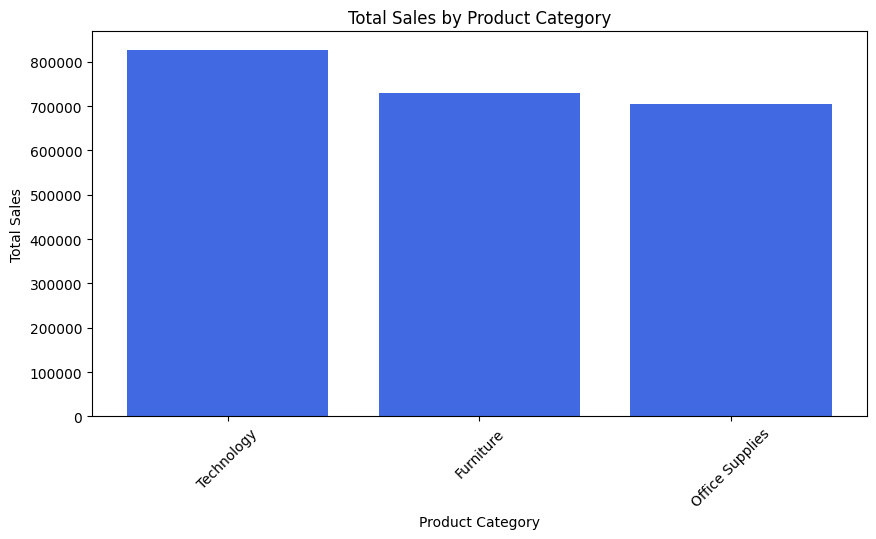

In [ ]:
# Group by 'Category' and sum the 'Sales'
category_sales = df.groupby("Category")["Sales"].sum().reset_index()

# Sort categories by total sales
category_sales = category_sales.sort_values(by="Sales", ascending=False)

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(category_sales["Category"], category_sales["Sales"], color="royalblue")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Insights from the Chart:
# Technology has the highest total sales.
# Furniture and Office Supplies have slightly lower sales but are still significant.

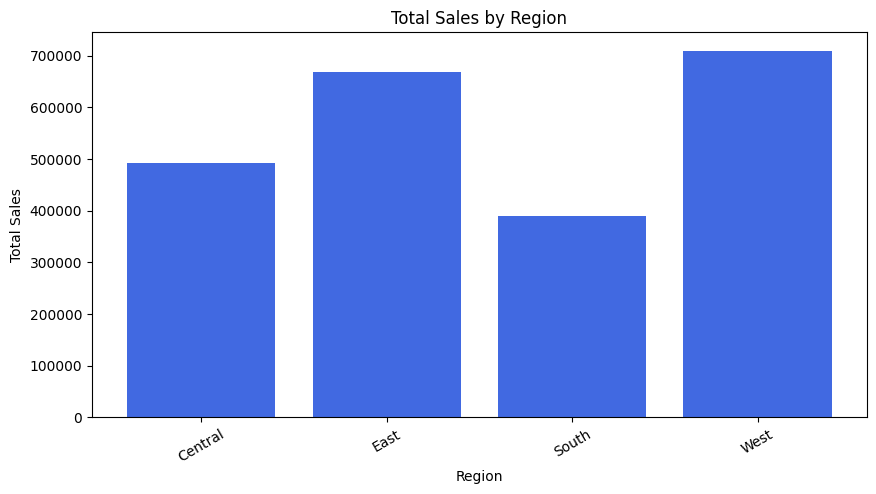

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# Grouping data by 'Region' and summing up sales
region_sales = df.groupby('Region')['Sales'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(region_sales.index, region_sales.values, color='royalblue')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=30)

# Display the plot
plt.show()


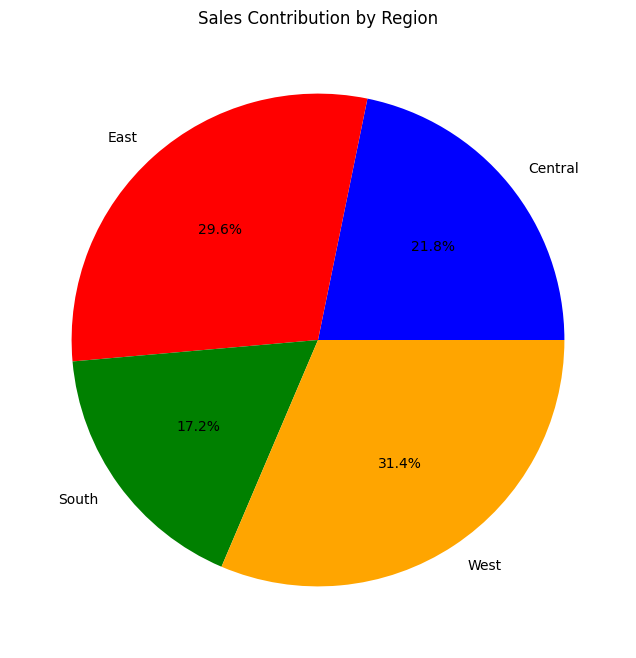

In [ ]:
# Plotting a Pie Chart for Sales Contribution by Region
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=['blue', 'red', 'green', 'orange'])

# Adding a title
plt.title('Sales Contribution by Region')

# Display the plot
plt.show()


In [ ]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year-Month'],
      dtype='object')


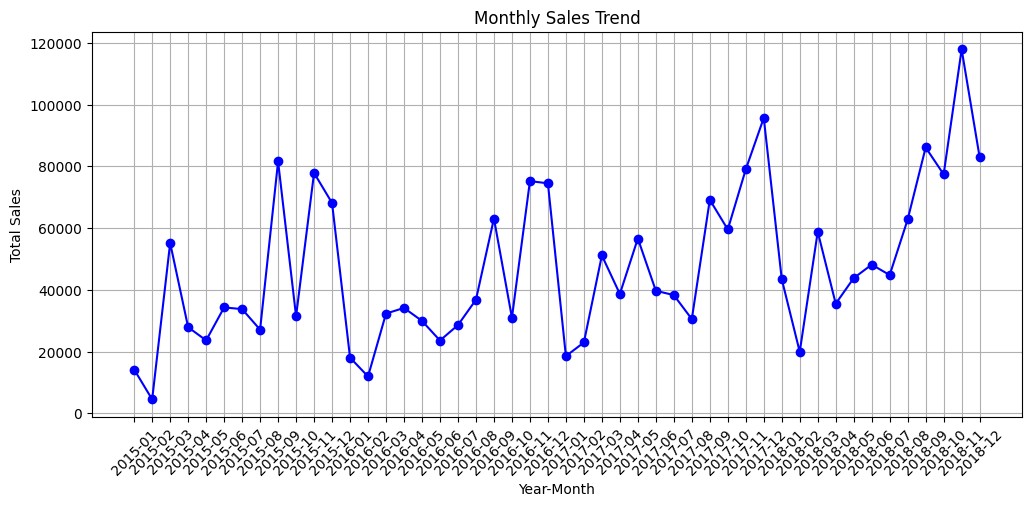

In [ ]:
import matplotlib.pyplot as plt

# Grouping sales by 'Year-Month'
monthly_sales = df.groupby('Year-Month')['Sales'].sum()

# Plotting the sales trend
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color='b')

# Formatting the graph
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)

# Show the plot
plt.show()



In [ ]:
# Sorting the monthly sales data in ascending order to get the lowest sales months
bottom_5_months = monthly_sales.sort_values().head(5)

# Display the bottom 5 months
print(bottom_5_months)


Year-Month
2015-02     4519.8920
2016-02    11951.4110
2015-01    14205.7070
2016-01    18066.9576
2017-01    18542.4910
Freq: M, Name: Sales, dtype: float64


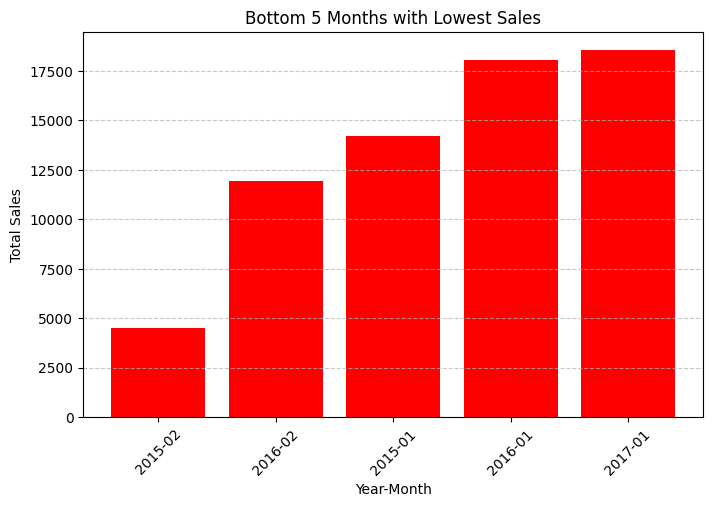

In [ ]:
# Plot the bottom 5 months with the lowest sales
plt.figure(figsize=(8, 5))
plt.bar(bottom_5_months.index.astype(str), bottom_5_months.values, color='r')

# Formatting the graph
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.title("Bottom 5 Months with Lowest Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.show()


In [ ]:
# Get the top 5 states with the highest sales
top_5_states = df.groupby("State")["Sales"].sum().nlargest(5)
print(top_5_states)


State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Name: Sales, dtype: float64


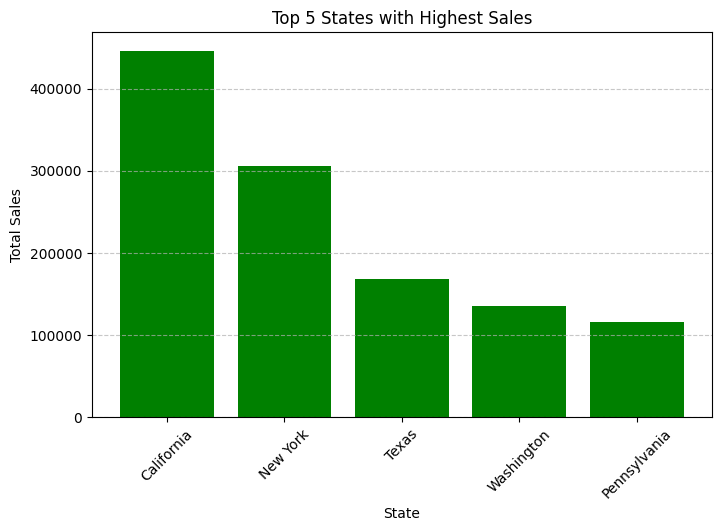

In [ ]:
# Plot the top 5 states with highest sales
plt.figure(figsize=(8, 5))
plt.bar(top_5_states.index, top_5_states.values, color='green')

# Formatting the graph
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Top 5 States with Highest Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
# Group by state and sum sales
sales_by_state = df.groupby('State')['Sales'].sum()

# Get bottom 5 states with lowest sales
bottom_5_states = sales_by_state.nsmallest(5)

# Display result
print(bottom_5_states)


State
North Dakota      919.910
West Virginia    1209.824
Maine            1270.530
South Dakota     1315.560
Wyoming          1603.136
Name: Sales, dtype: float64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'North Dakota'),
  Text(1, 0, 'West Virginia'),
  Text(2, 0, 'Maine'),
  Text(3, 0, 'South Dakota'),
  Text(4, 0, 'Wyoming')])

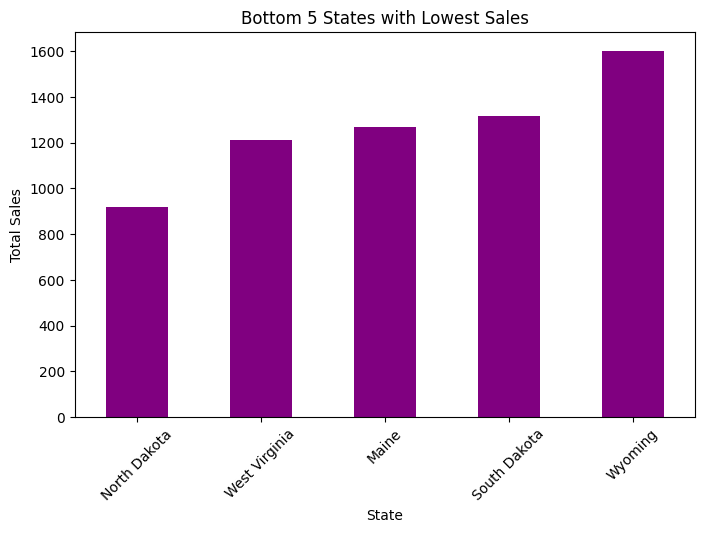

In [ ]:
import matplotlib.pyplot as plt

# Plot bottom 5 states with lowest sales
plt.figure(figsize=(8,5))
bottom_5_states.plot(kind='bar', color='purple')

# Add labels and title
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Bottom 5 States with Lowest Sales")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)


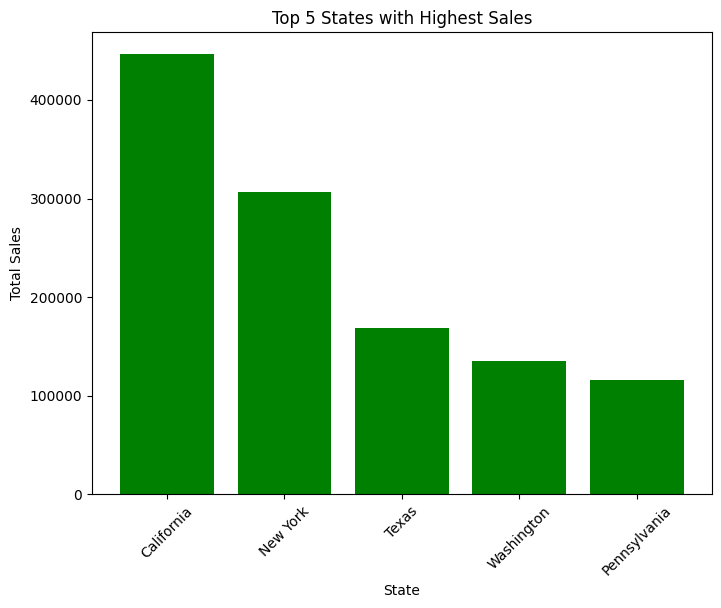

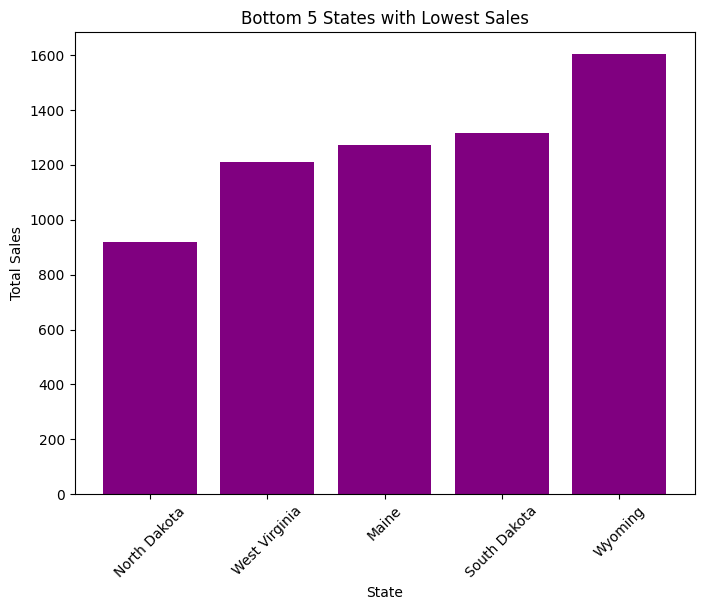

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/train.csv.zip")  # Replace with your actual dataset filename

# Group by 'State' and sum the 'Sales'
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Get top 5 states with highest sales
top_5_states = state_sales.nlargest(5, 'Sales')

# Get bottom 5 states with lowest sales
bottom_5_states = state_sales.nsmallest(5, 'Sales')

# Plot top 5 states
plt.figure(figsize=(8,6))
plt.bar(top_5_states['State'], top_5_states['Sales'], color='green')
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Top 5 States with Highest Sales")
plt.xticks(rotation=45)
plt.show()

# Plot bottom 5 states
plt.figure(figsize=(8,6))
plt.bar(bottom_5_states['State'], bottom_5_states['Sales'], color='purple')
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Bottom 5 States with Lowest Sales")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Top 5 States with Highest Sales:
#California has the highest sales, followed by New York, Texas, Washington, and Pennsylvania.
#Bottom 5 States with Lowest Sales :
# North Dakota has the lowest sales, followed by West Virginia, Maine, South Dakota, and Wyoming.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import pandas as pd

df = pd.read_csv("//content/train.csv.zip")  # Adjust path if needed
print(df.head())  # Show first 5 rows

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [5]:
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [6]:
# If Profit is missing, estimate it using a known margin (assuming a 20% margin for example)
df['Estimated Profit'] = df['Sales'] * 0.2  # Adjust percentage based on business logic



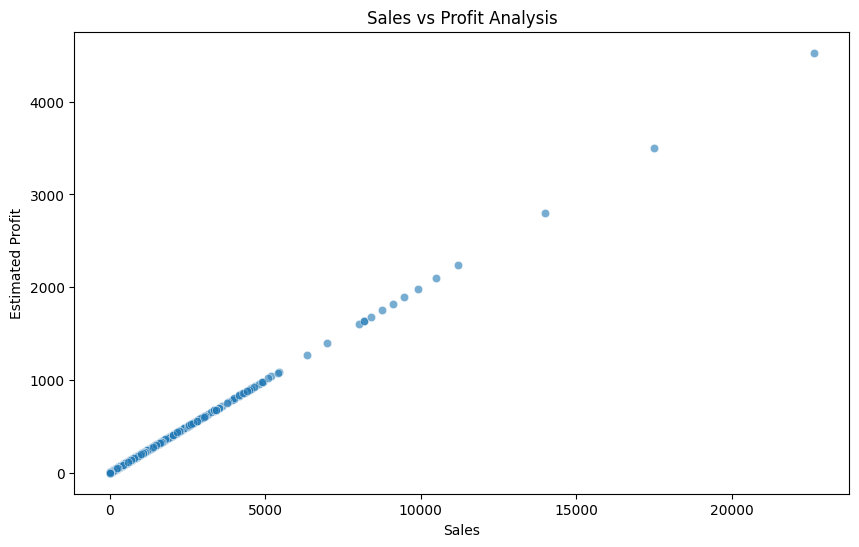

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Sales'], y=df['Estimated Profit'], alpha=0.6)

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Estimated Profit')
plt.title('Sales vs Profit Analysis')
plt.show()


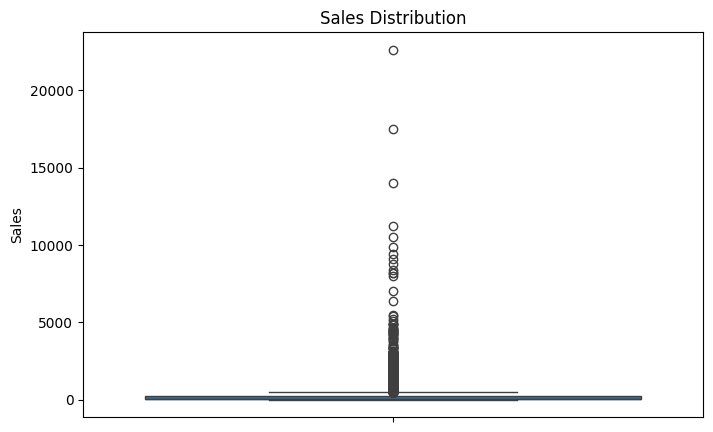

In [8]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Create a box plot for Sales
sns.boxplot(y=df['Sales'])

# Add title
plt.title("Sales Distribution")

# Show plot
plt.show()


In [9]:
 #Analysis of Box Plot:
#Outliers Present:

#There are many high-value sales outliers above the upper whisker.
#This means some orders have very high sales values compared to the majority.
#Sales Distribution is Skewed:

#Most sales values are concentrated at the lower end.
#The presence of extreme values suggests a right-skewed distribution.

In [10]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

# Display number of rows before and after removing outliers
print(f"Original dataset: {df.shape[0]} rows")
print(f"Dataset after removing outliers: {df_filtered.shape[0]} rows")


Original dataset: 9800 rows
Dataset after removing outliers: 8655 rows


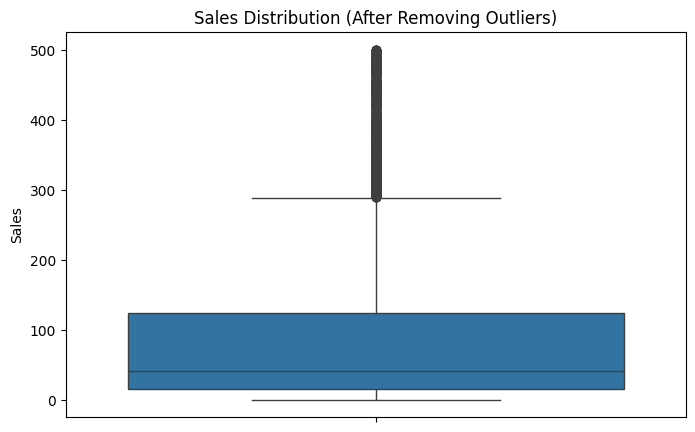

In [11]:
# Box plot after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_filtered['Sales'])
plt.title("Sales Distribution (After Removing Outliers)")
plt.ylabel("Sales")
plt.show()


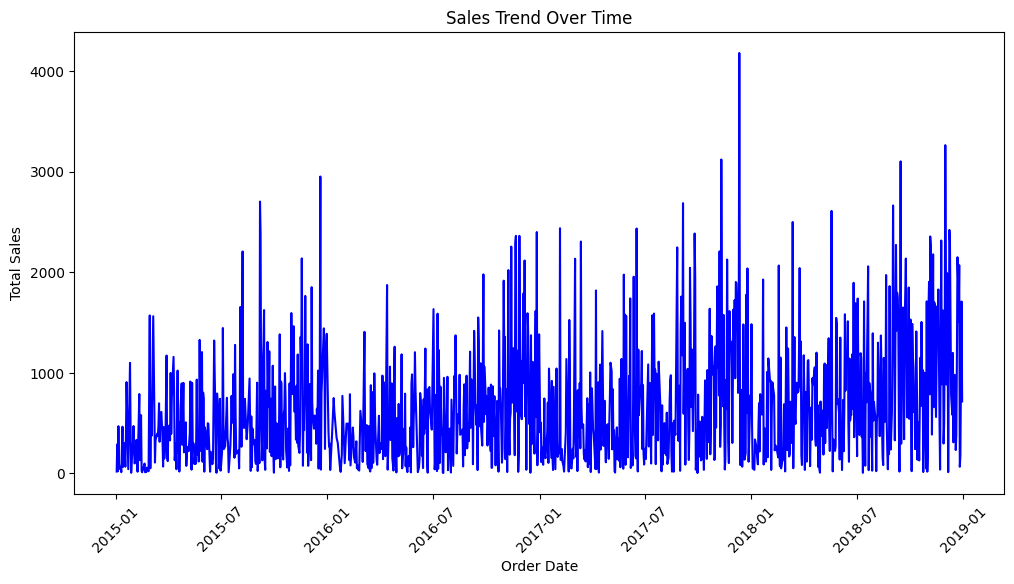

In [14]:
# Convert 'Order Date' to datetime format (handling day-first format)
df_filtered.loc[:, 'Order Date'] = pd.to_datetime(df_filtered['Order Date'], dayfirst=True, errors='coerce')


# Drop rows with NaT values (if any dates couldn't be converted)
df_filtered = df_filtered.dropna(subset=['Order Date'])

# Group by order date and sum sales
sales_trend = df_filtered.groupby('Order Date')['Sales'].sum().reset_index()

# Line plot for sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_trend, color='blue')

# Add labels and title
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()



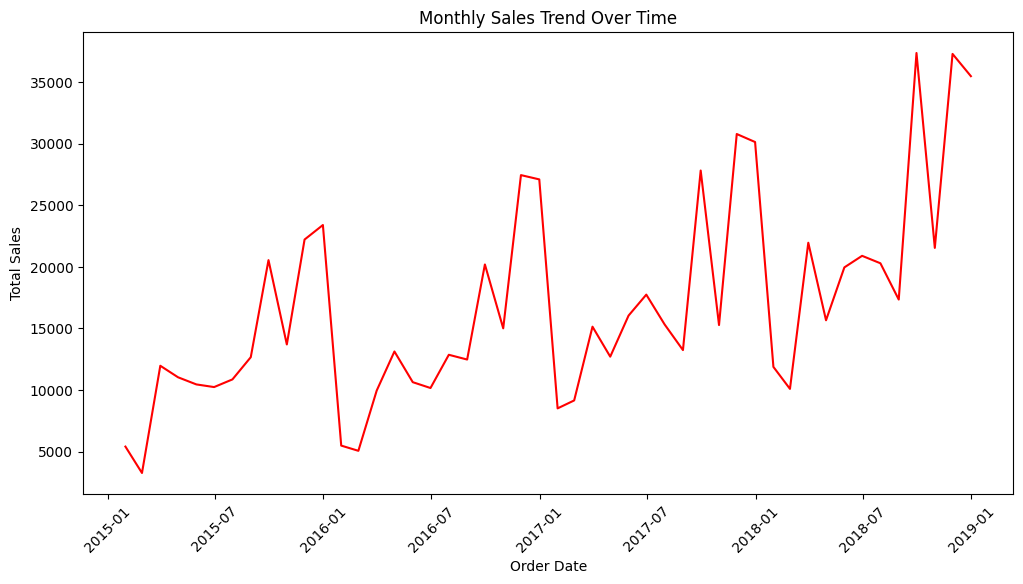

In [17]:
# Resample sales data by month
sales_trend_monthly = df_filtered.resample('ME', on='Order Date')['Sales'].sum().reset_index()

# Plot the smoothed trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_trend_monthly, color='red')

plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()


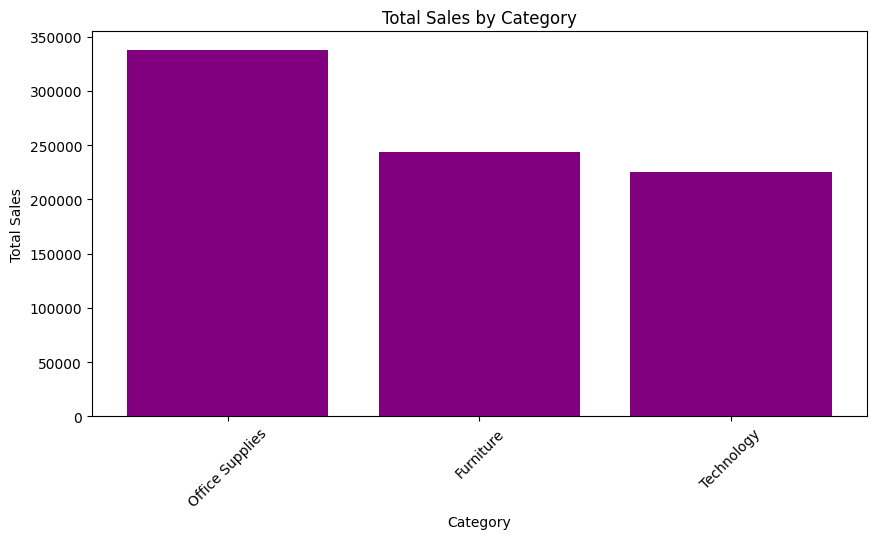

In [18]:
# Group sales by category
category_sales = df_filtered.groupby('Category')['Sales'].sum().reset_index()

# Sort categories by total sales
category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(category_sales['Category'], category_sales['Sales'], color='purple')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()


In [19]:
# OBSERVATION:
# Office Supplies has the highest total sales.
# Furniture and Technology have almost similar sales, but both are lower than Office Supplies.


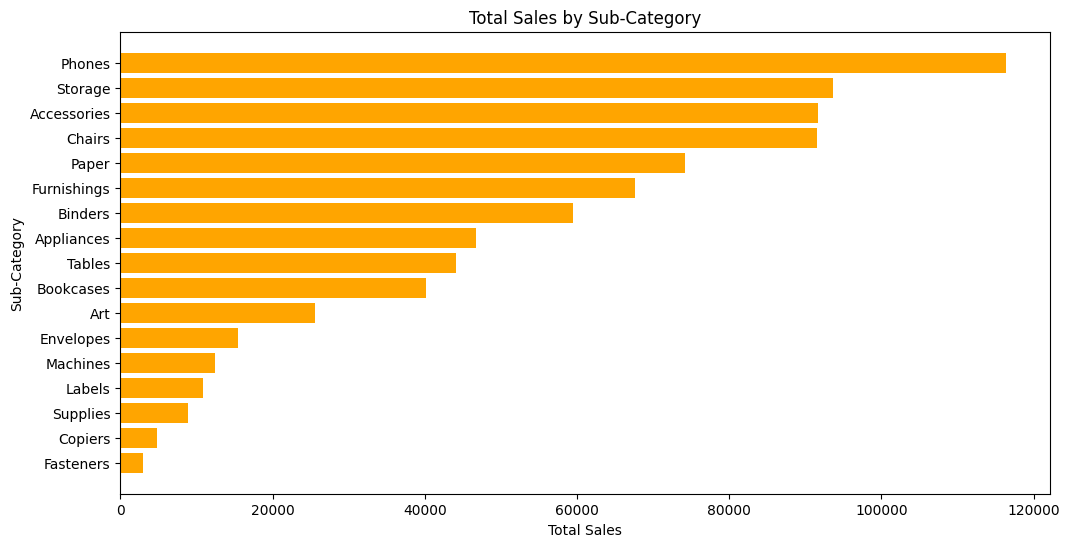

In [20]:
# Group sales by sub-category
subcategory_sales = df_filtered.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sort sub-categories by sales
subcategory_sales = subcategory_sales.sort_values(by='Sales', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(subcategory_sales['Sub-Category'], subcategory_sales['Sales'], color='orange')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales by Sub-Category')
plt.show()


In [21]:
# Phones have the highest sales, followed by Storage and Accessories.
# Fasteners, Copiers, and Supplies have the lowest sales.


In [23]:
print(df_filtered.columns)



Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Estimated Profit'],
      dtype='object')


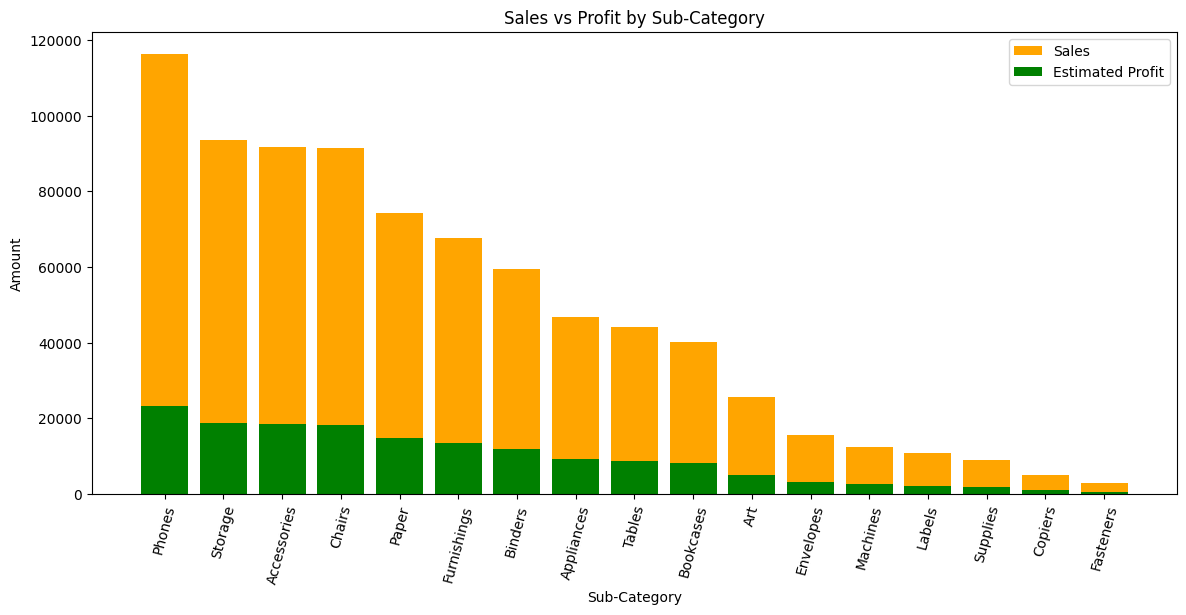

In [25]:
# Group by sub-category for sales and profit
subcategory_performance = df_filtered.groupby('Sub-Category')[['Sales', 'Estimated Profit']].sum().reset_index()


# Sort by sales
subcategory_performance = subcategory_performance.sort_values(by='Sales', ascending=False)

# Plot sales vs profit
plt.figure(figsize=(14, 6))
plt.bar(subcategory_performance['Sub-Category'], subcategory_performance['Sales'], label='Sales', color='orange')
plt.bar(subcategory_performance['Sub-Category'], subcategory_performance['Estimated Profit'], label='Estimated Profit', color='green')
plt.xticks(rotation=75)
plt.xlabel('Sub-Category')
plt.ylabel('Amount')
plt.title('Sales vs Profit by Sub-Category')
plt.legend()
plt.show()


In [26]:
 # Observations:
# Phones have the highest sales and a good profit.
# Storage, Accessories, and Chairs also have high sales but moderate profit.
# Some sub-categories, like Tables and Bookcases, have decent sales but relatively low profit.
# Fasteners and Copiers have the lowest sales and profit.

In [27]:
# Insights from Sales vs. Profit Analysis
# Highest Sales Category:

# The Technology category has the highest sales compared to Furniture and Office Supplies.
# Highest Profit Category:

# Technology also has the highest profit, indicating it is a highly profitable category.
# Most Profitable Sub-Category:

# phones generate the most profit among all sub-categories.
# High Sales but Low Profit:

# Tables and Bookcases have high sales but low profit, meaning they might have high costs or discounts affecting profitability.
# Low Sales and Low Profit:

# Fasteners and Copiers have both low sales and low profit, which may indicate low demand or high costs.

# Conclusion:

# Investing in Phones and Accessories is a good strategy since they drive both high sales and high profit.
# Improving the profit margin on Tables and Bookcases could help boost profits in the Furniture category.
# Categories with low sales and low profit (like Fasteners) should be reconsidered for business focus.

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
